In [1]:
from bonsai.data_loaders import load_data
from bonsai.net import Net
from bonsai.trainers import *
from bonsai.helpers import *
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('material')


%load_ext autoreload
%autoreload 2

import pickle as pkl
import ast
from tqdm.auto import tqdm

In [11]:
cs = [16,32,64,128,256,512,1024,2048]
ws = [1,2,4,8,16,32]

In [12]:
sizes = {}
for c in tqdm(cs):
    for w in ws:
        dim = [64,c,w,w]
        cmd = 'python3 {}/op_sizer.py {}'.format(os.getcwd(), " ".join([str(x) for x in dim]))
        out = subprocess.check_output(cmd.split()).decode("ascii").strip()
        sizes[tuple(dim)] = ast.literal_eval(out)

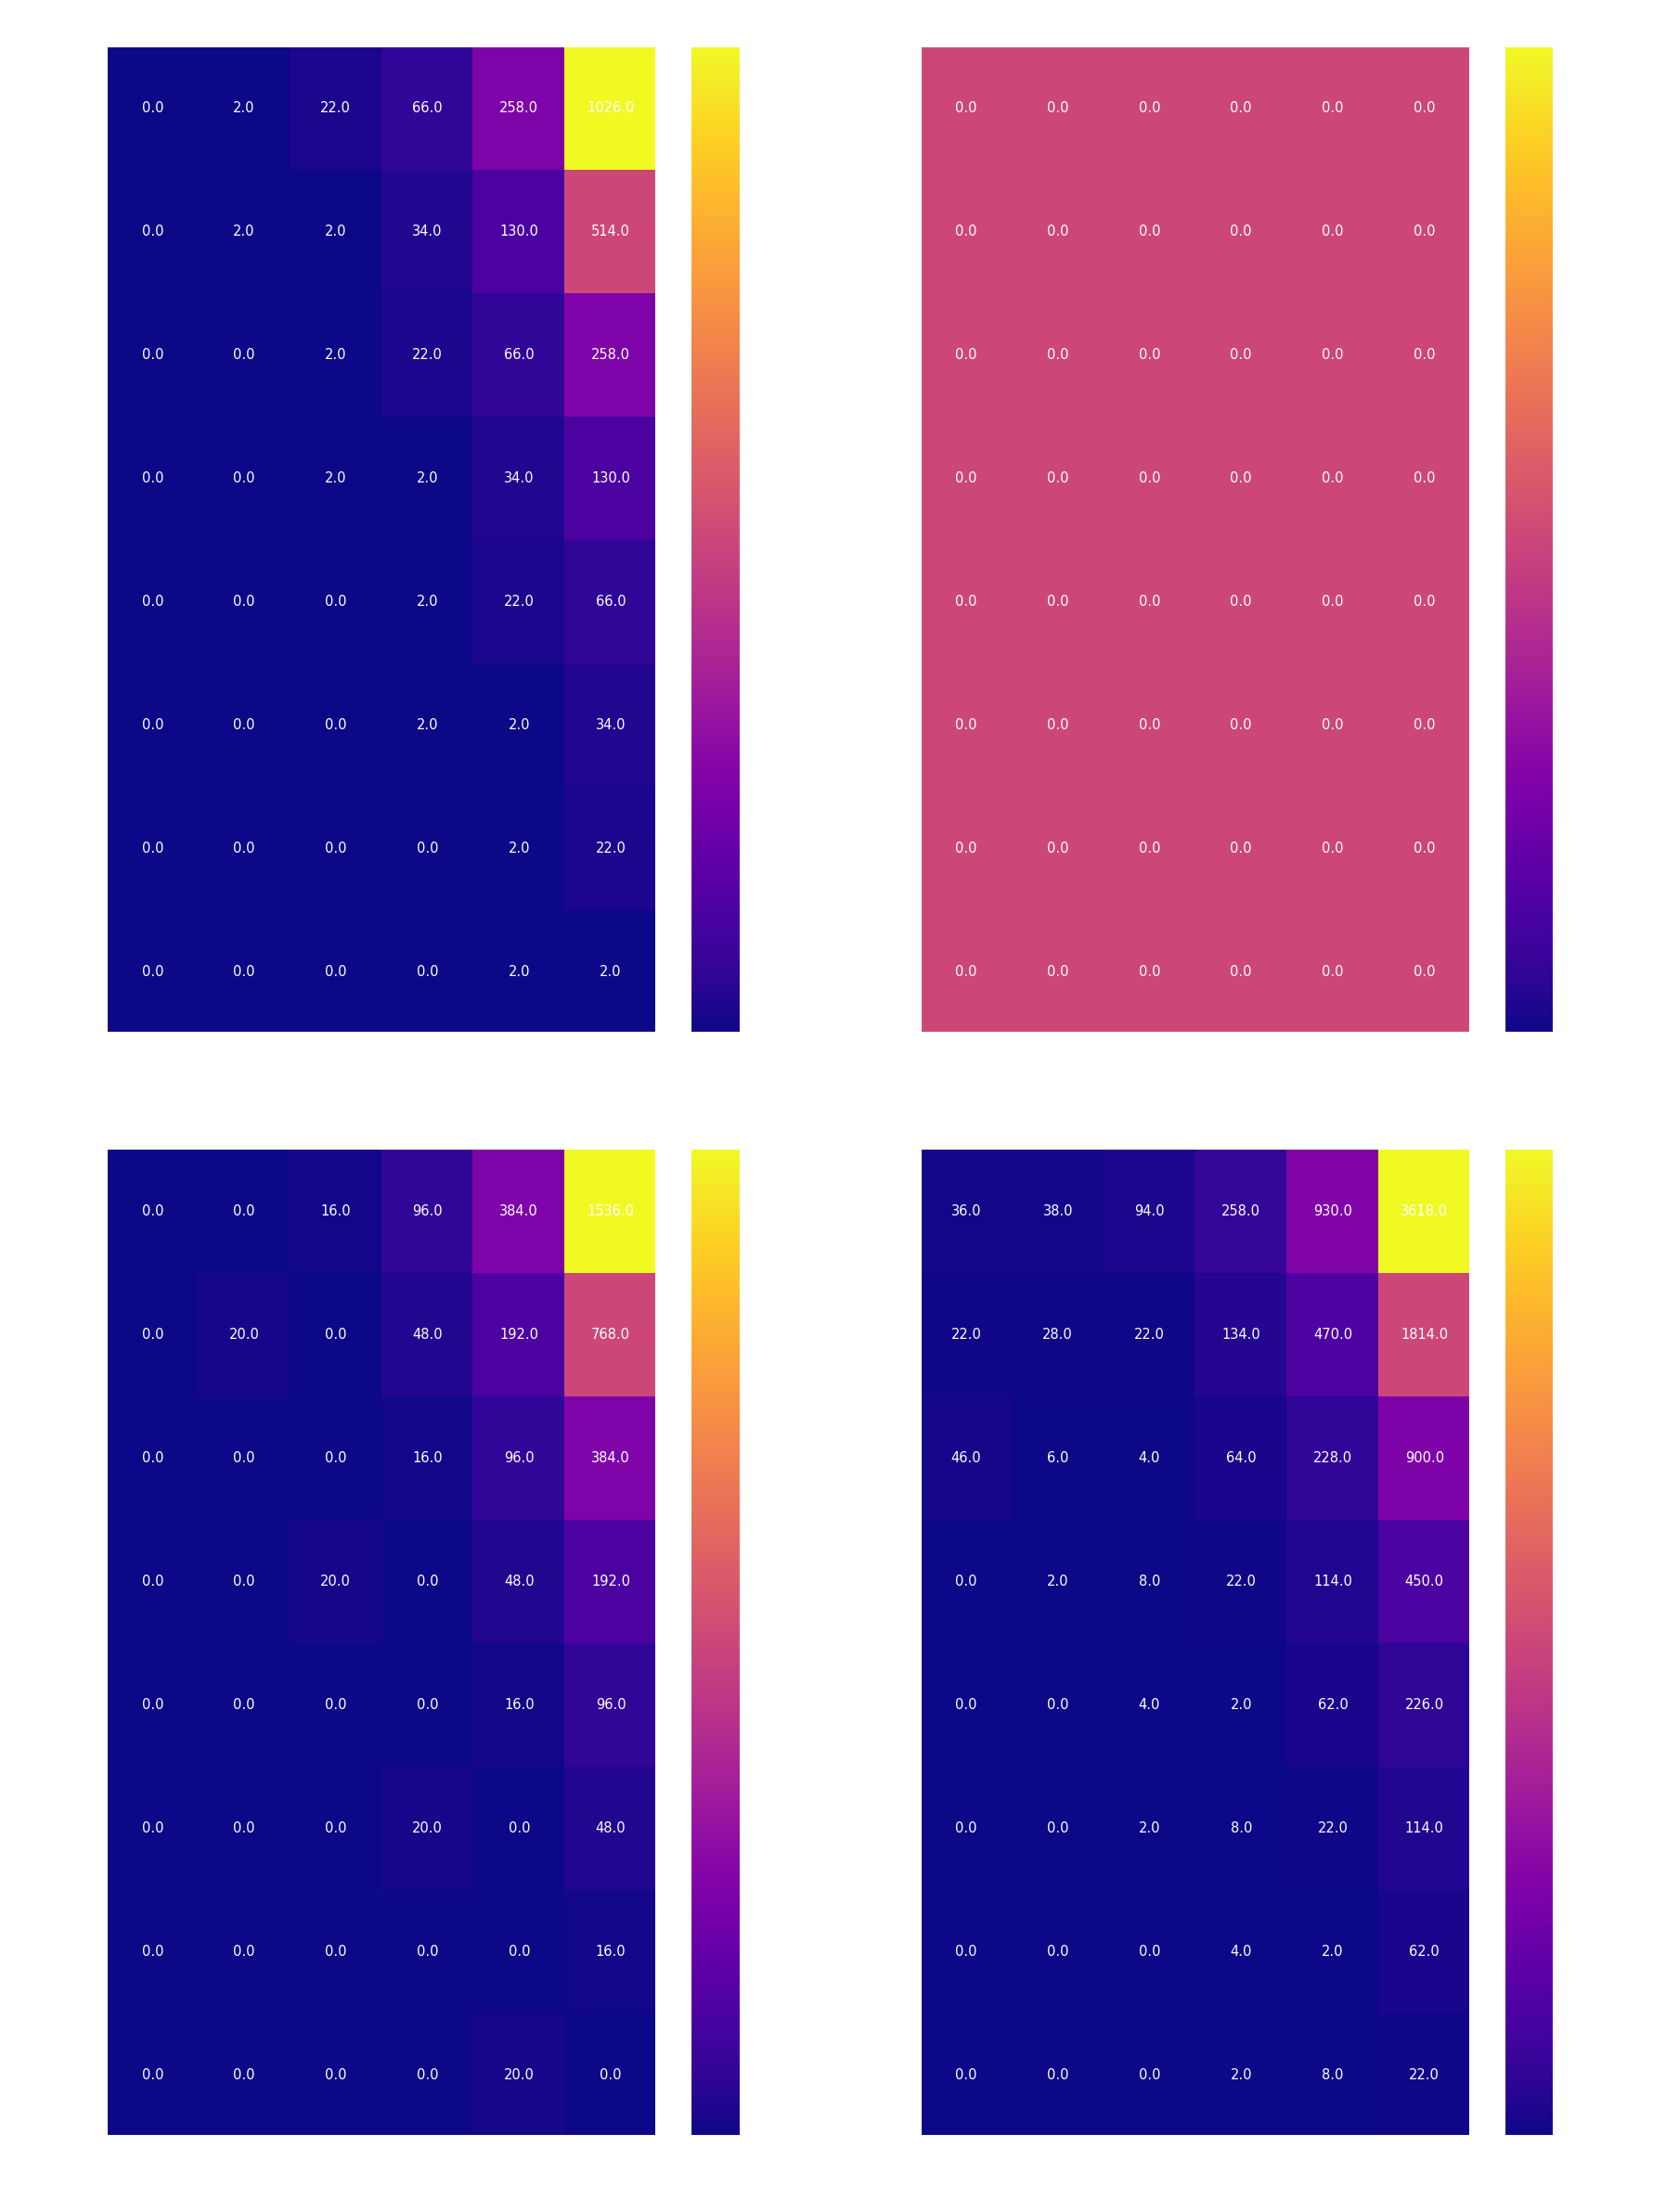

In [18]:
plt.figure(figsize=(len(ws)*2,len(cs)*2),dpi=150)
for subplot_j,op in enumerate(['Conv_1x1','Identity','Max_Pool_3x3','Sep_Conv_3x3']):
    plt.subplot(2,2,subplot_j+1)
    mat = np.zeros([len(cs),len(ws)])
    for c in cs:
        for w in ws:
            i,j = int(np.log2(c))-4,int(np.log2(w))
            mat[i,j]=sizes[(64,c,w,w)][op]
    plt.pcolor(mat,cmap=cm.plasma,vmin=0)
    plt.title("{}".format(op,c))

    plt.xticks(np.arange(len(ws))+.5,["{}x{}".format(w,w) for w in ws])
    plt.yticks(np.arange(len(cs))+.5,cs)
    plt.xlabel("$WxH$")
    plt.ylabel("C")
    plt.colorbar()
    for i in range(len(cs)):
        for j in range(len(ws)):
            text = plt.text(j+.5, i+.5, mat[i, j],fontsize=7,ha="center", va="center", color="w")
plt.tight_layout()
plt.show()

In [ ]:
128*8*8

In [ ]:
512*4*4